# Complex Mappings

A visualisation of a few examples of complex mappings via a simple `python` API.

In [17]:
%matplotlib notebook
%run api.py

# constants
PI = np.pi
TAU = 2 * PI

The API provides the functions:
- `init_grid`: creates complex gridlines points
- `init_polar`: creates complex polar coordinate points
- `plot_map`: plots color-coded curves in the complex plane

<IPython.core.display.Javascript object>


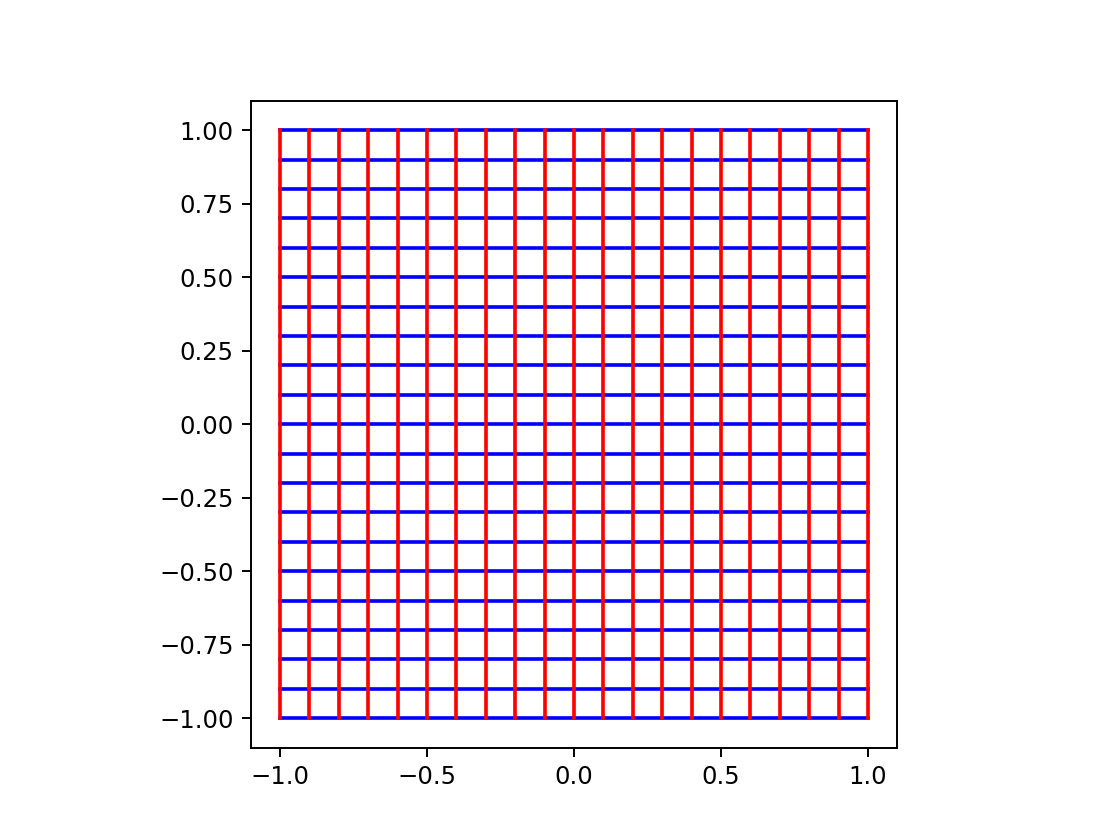

In [7]:
grid = init_grid(nb_pts=1000)
plot_map(grid)

<IPython.core.display.Javascript object>


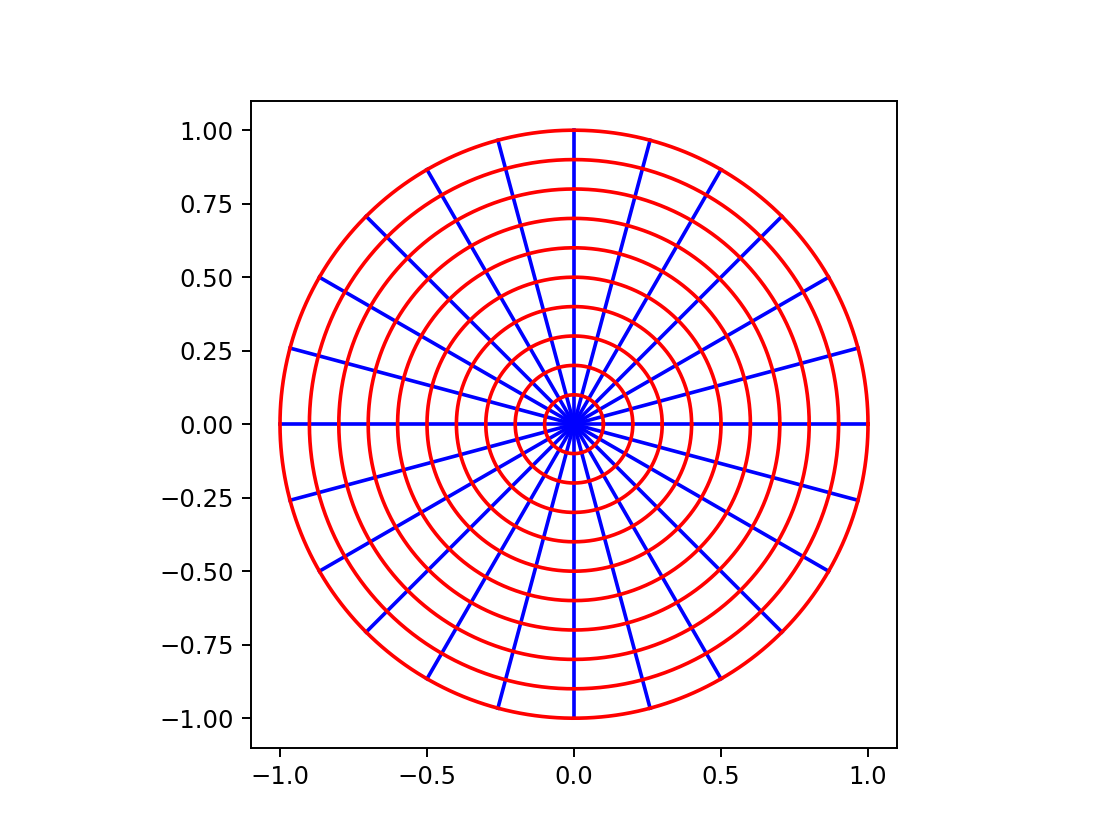

In [6]:
polar = init_polar(nb_pts=1000)
plot_map(polar)

## Functions

In this section we will explore a few examples of complex functions.
Throughout this notebook we will use the following notation:

- $z = x + i y$ where $x$ and $y$ are real variables
- $w = f(z) = u(x,y) + i v(x,y)$ where $u$ and $v$ are real-valued functions

### The Square Function

$$ f:z\mapsto z^2 $$

<IPython.core.display.Javascript object>


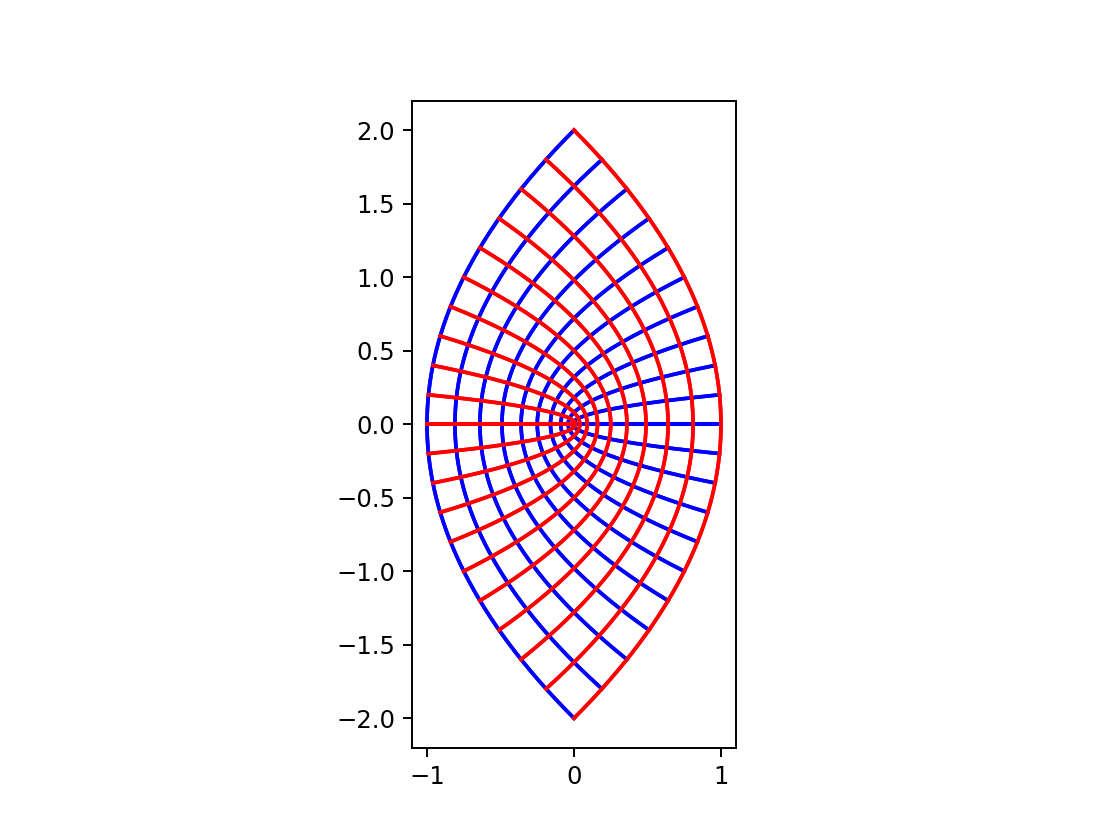

In [10]:
square = lambda z : z ** 2
plot_map(grid, square)

### The Inverse Function

$$ f:z\mapsto \frac{1}{z} $$

<IPython.core.display.Javascript object>


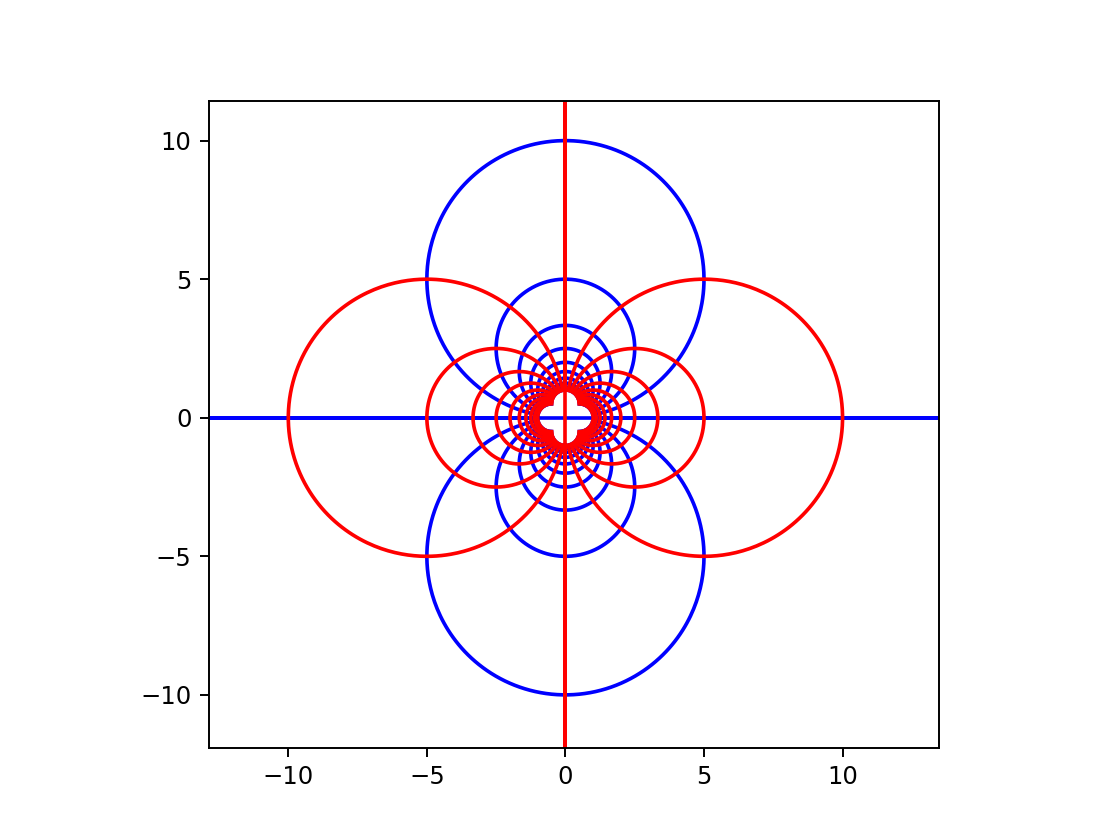

In [11]:
plot_map(grid, lambda z: 1/z)

### The Square Root Function

$$ f:z\mapsto \sqrt{z} $$

<IPython.core.display.Javascript object>


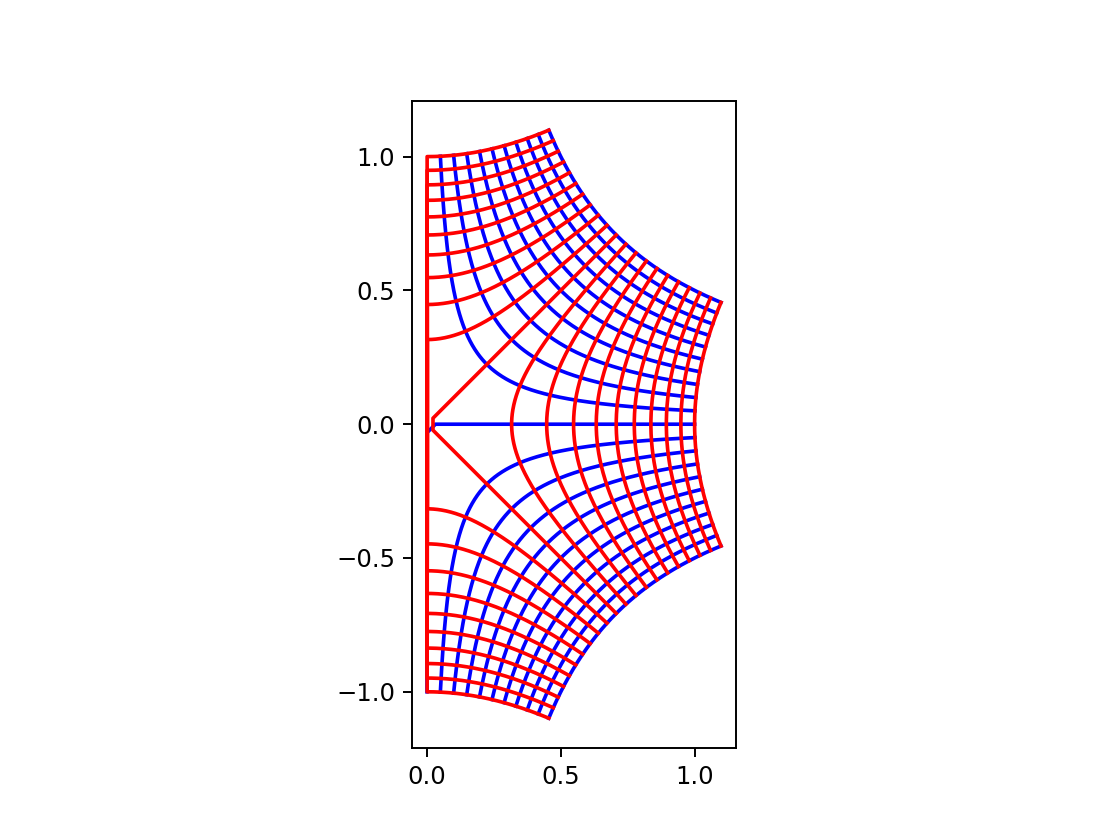

In [12]:
plot_map(grid, np.sqrt)

### The Exponential Function

$$ f:z\mapsto e^z $$

<IPython.core.display.Javascript object>


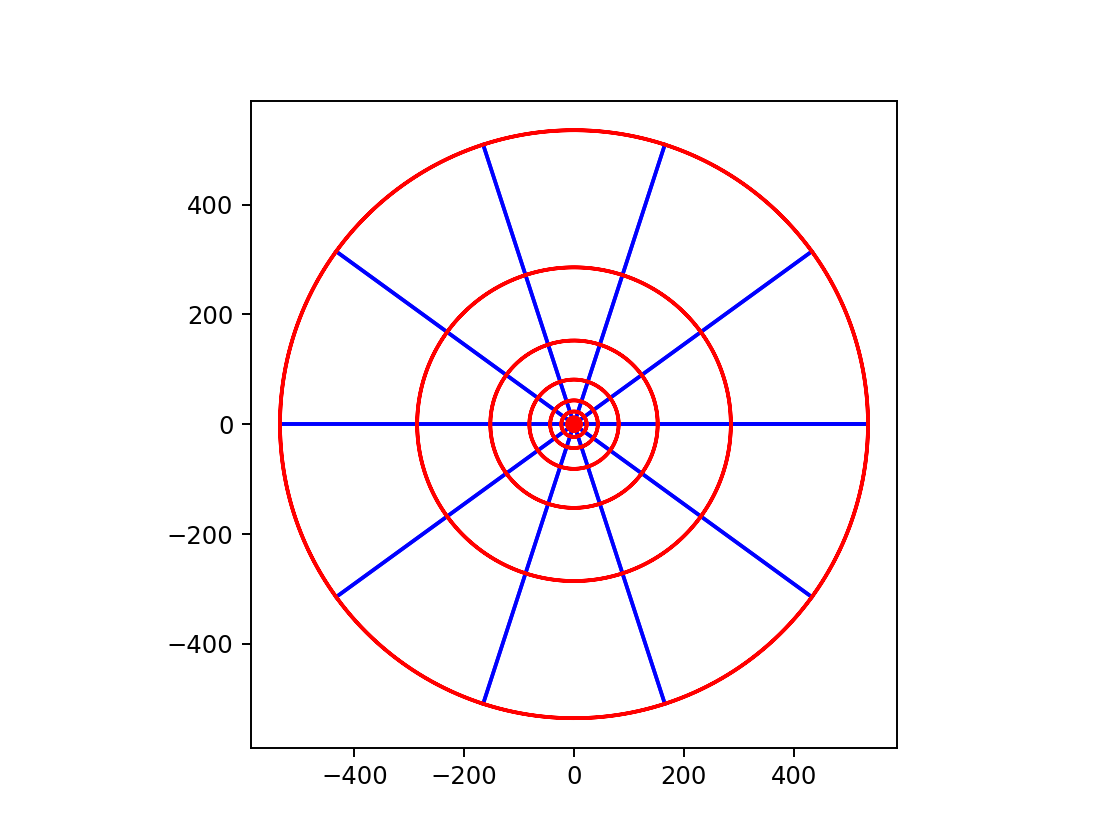

In [24]:
plot_map(grid, lambda z: np.exp(TAU * z))

### The Logarithm Function

$$ f:z\mapsto \ln{z} $$

<IPython.core.display.Javascript object>


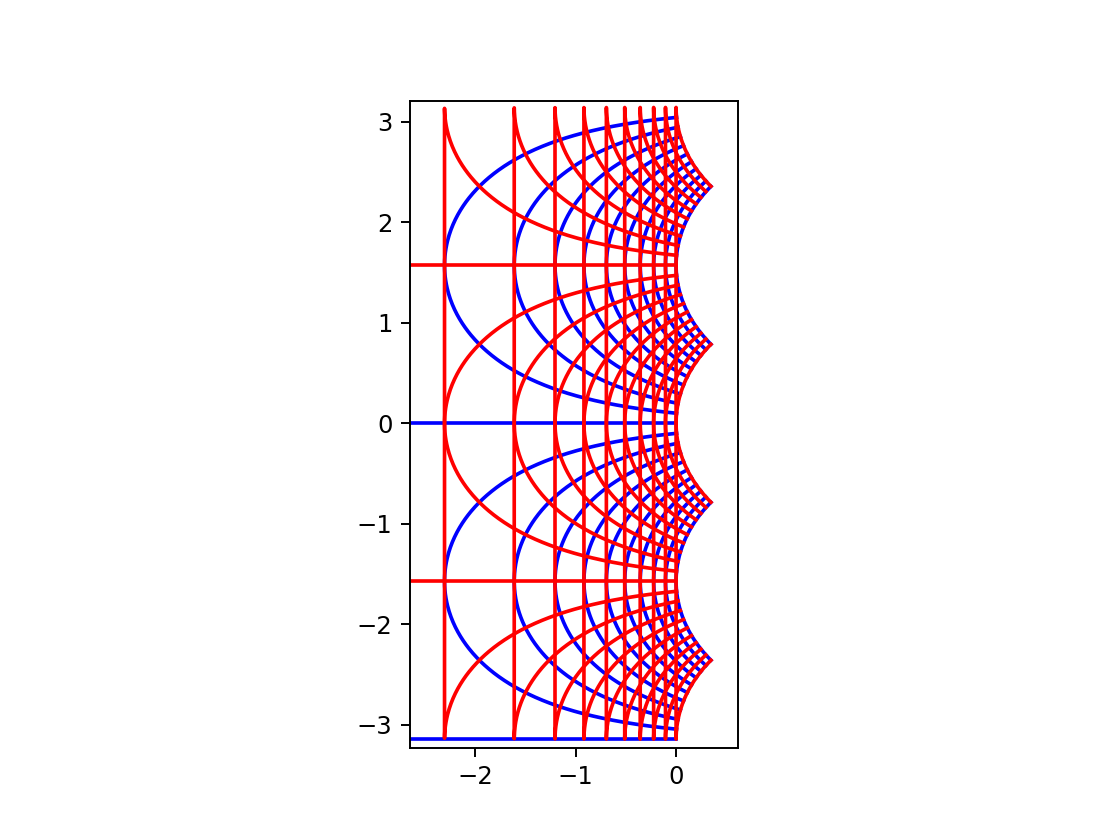

In [25]:
plot_map(grid, np.log)

### Trigonometric Functions

<IPython.core.display.Javascript object>


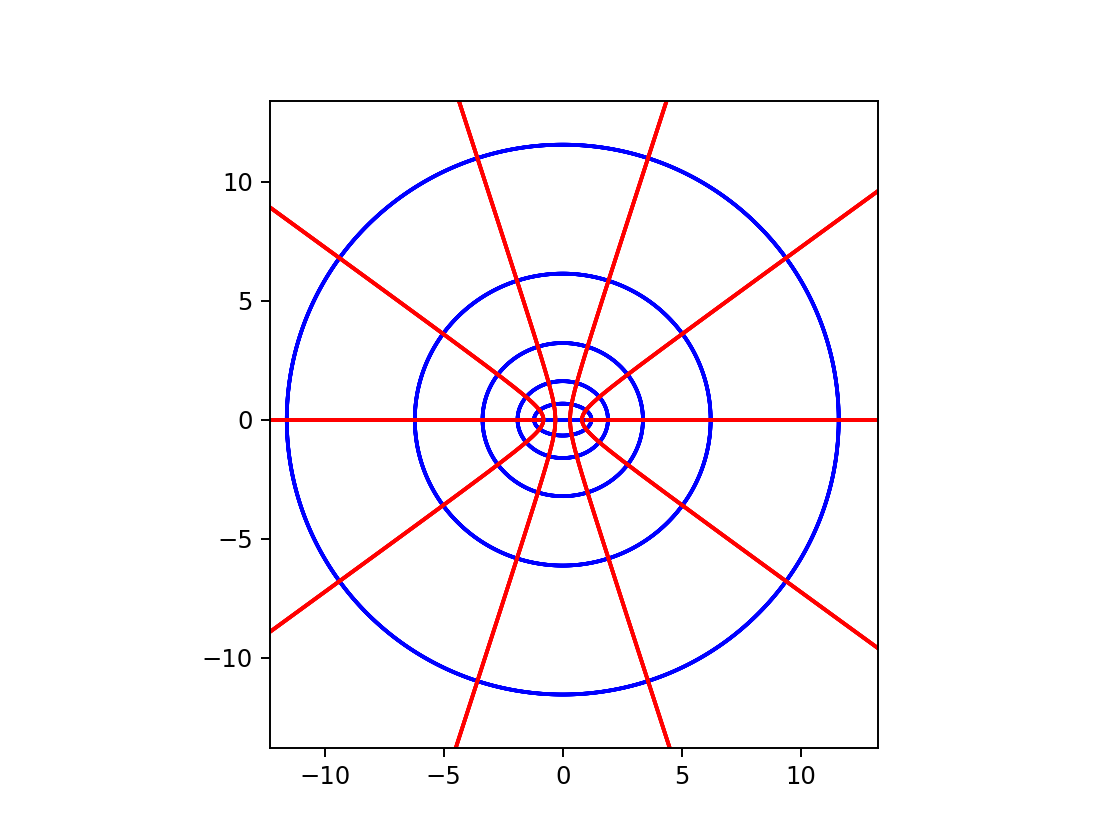

<IPython.core.display.Javascript object>


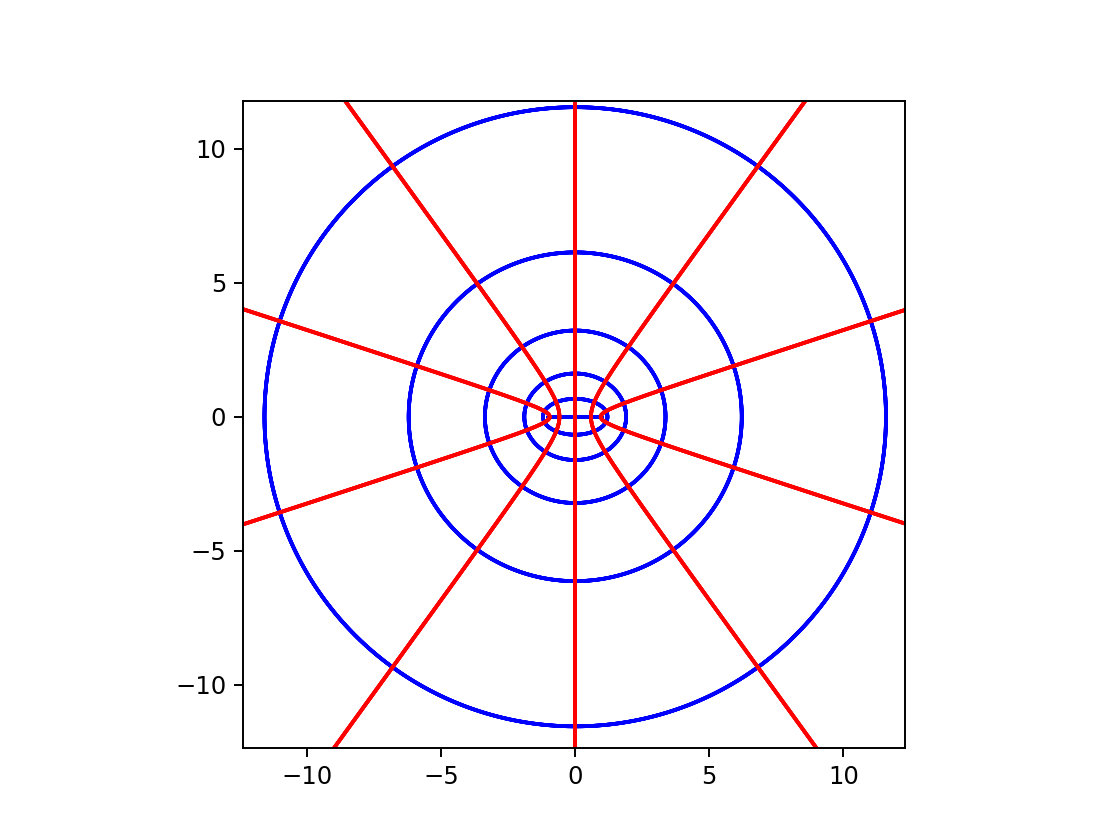

In [26]:
plot_map(grid, lambda z: np.cos(TAU * z))
plot_map(grid, lambda z: np.sin(TAU * z))